# Figure 2: North Pole plots of cloud biases for all models

### Add paths to run locally or off NIRD

In [4]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

### Check running location and adjust working directory appropriately.

In [5]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Load data into metric classes

In [6]:
allcases = SatComp_Metric(case_dir)

allcases.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allcases.add_case('CESM2_slfvars', label="CAM6")
allcases.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allcases.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
# allcases.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allcases.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allcases.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allcases.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 \n Fit 4")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load

In [7]:
allcases.band_bias('CLDTOT_CAL',[66,82])

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

[['CAM6-Oslo', array(-2.0106763)],
 ['CAM6', array(2.13134918)],
 ['CAM6-OsloIce', array(-5.79585754)],
 ['CAM6-Oslo \n Fit 1', array(-3.55012017)],
 ['CAM6-OsloIce \n Fit 2', array(-2.00652738)],
 ['CAM6-OsloIce \n Fit 3', array(-0.33358325)],
 ['CAM6 \n Fit 4', array(-5.07441276)]]

In [9]:
allcases.band_bias('CLDTOT_CAL_ICE',[66,82])

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

[['CAM6-Oslo', array(0.72205001)],
 ['CAM6', array(-7.91897894)],
 ['CAM6-OsloIce', array(6.12218441)],
 ['CAM6-Oslo \n Fit 1', array(1.12950528)],
 ['CAM6-OsloIce \n Fit 2', array(1.63510622)],
 ['CAM6-OsloIce \n Fit 3', array(3.57021379)],
 ['CAM6 \n Fit 4', array(-8.13947182)]]

In [10]:
allcases.band_bias('CLDHGH_CAL_ICE',[66,82])

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.p

[['CAM6-Oslo', array(3.26962953)],
 ['CAM6', array(-6.26821501)],
 ['CAM6-OsloIce', array(5.45693143)],
 ['CAM6-Oslo \n Fit 1', array(3.27467631)],
 ['CAM6-OsloIce \n Fit 2', array(3.72722392)],
 ['CAM6-OsloIce \n Fit 3', array(4.63441089)],
 ['CAM6 \n Fit 4', array(-6.5120707)]]

In [22]:
allcases.band_bias('CLDTOT_CAL',[66,82],season='DJF')

[['CAM6-Oslo', array(-1.74486003)],
 ['CAM6', array(6.81600287)],
 ['CAM6-OsloIce', array(-9.75676076)],
 ['CAM6-Oslo \n Fit 1', array(-4.40164624)],
 ['CAM6-OsloIce \n Fit 2', array(-1.93147719)],
 ['CAM6-OsloIce \n Fit 3', array(0.25068624)],
 ['CAM6 \n Fit 4', array(-7.84004845)]]

## Plot the stuff

%TS: For Figs 2 & 3, I wonder if you could adjust the color bar to bring out differences better. It seems to me the colors saturate at too small values as it is.

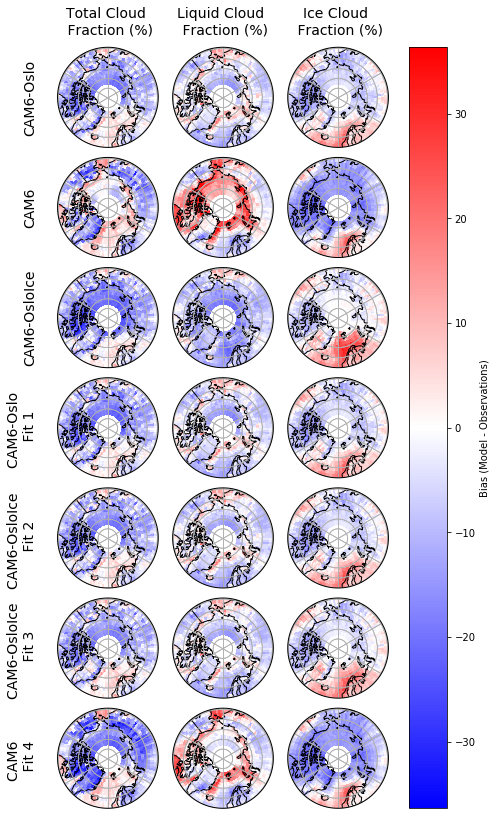

In [7]:
fig1, cbar = allcases.plot2D('CLDTOT_CAL',season='MAM',layers=True,projection="Arctic",bias=True)

In [52]:
to_png(fig1,"combined_annualbiases")

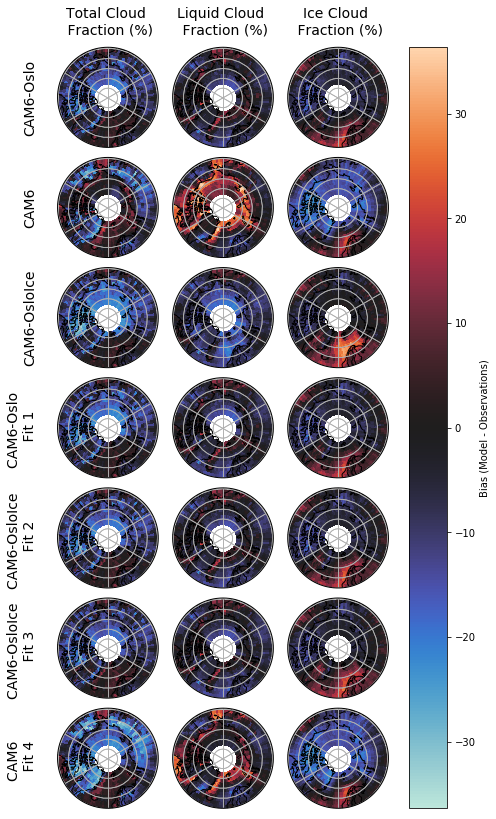

In [13]:
fig1, cbar = allcases.plot2D('CLDTOT_CAL',season='MAM',layers=True,projection="Arctic",bias=True,
                            cmap=plt.get_cmap('icefire'))

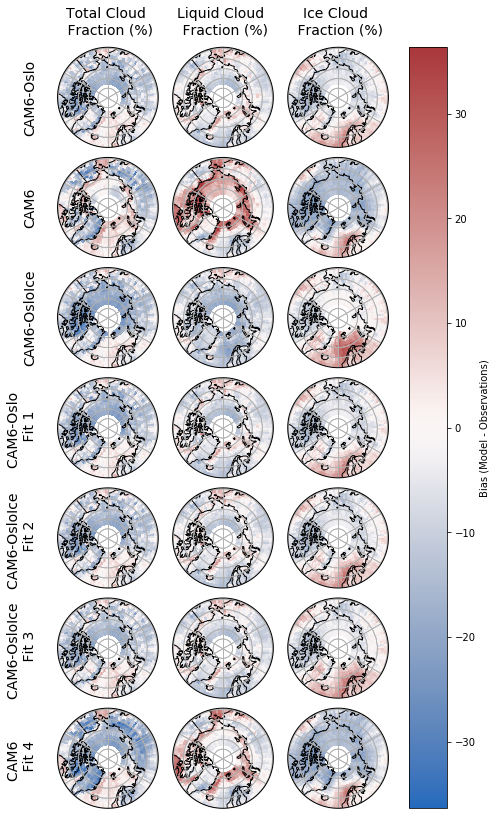

In [14]:
fig1, cbar = allcases.plot2D('CLDTOT_CAL',season='MAM',layers=True,projection="Arctic",bias=True,
                            cmap=plt.get_cmap('vlag'))